You need to set up your chromedriver path in the scraper.py file first before using this notebook <br>

TODO Punkte Beschreibung Restaurant type aufbau

In [20]:
from scraper import restaurants
from data_helper import tag_correction
import visualization

The next cell will take quite a long time (about a minute or longer) to gather the data <br>
Don't panic if the browser starts working on its own, it is supposed to do so

In [14]:
city1 = restaurants("Osnabrück")
city2 = restaurants("Bielefeld")

<class 'selenium.common.exceptions.TimeoutException'>
<class 'selenium.common.exceptions.TimeoutException'>


This cell changes the default tags of Lieferando to our custom tags <br>
we only change it for one city so you can see the difference in the plots

In [15]:
# our custom kitchen groups for higher readability and cleaner plots
kitchens = {"Asiatisch": ["Sushi", "Japanisch", "Poke bowl", "Indisch", "Thailändisch", "Curry",
                        "Vietnamesisch", "Chinesisch", "Koreanisch", "Dumplings", "Indonesisch", "Pakistanisch"],
        "Orientalisch": ["Türkisch", "Döner", "Falafel", "100% Halal", "Persisch", "Türkische Pizza",
                        "Arabisch", "Syrisch", "Libanesisch", "Gyros", "Griechisch", "Balkanküche"],
        "Italienisch": ["Italienische Pizza", "Pasta"],
        "Amerikanisch": ["Burger", "Amerikanische Pizza", "Hot Dog", "Sandwiches", "Mexikanisch", "Argentinisch", "Spareribs"],
        "Vegetarisch": ["Vegan"],
        "Cafe & Kuchen": ["Eiscreme", "Snacks", "Kuchen", "Nachspeisen", "Backwaren", "Café", "Frühstück"]}

city1 = tag_correction(city1, kitchens)

Pie plots of the distribution of kitchens in each city

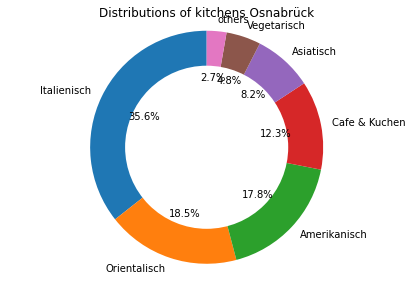

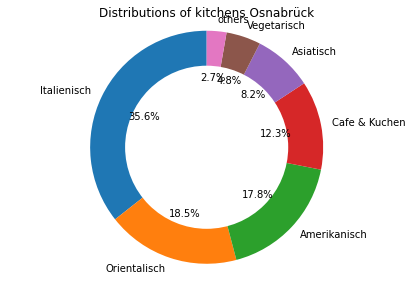

In [21]:
visualization.basic_pie(city1, "Osnabrück")

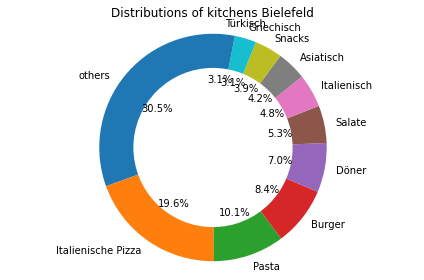

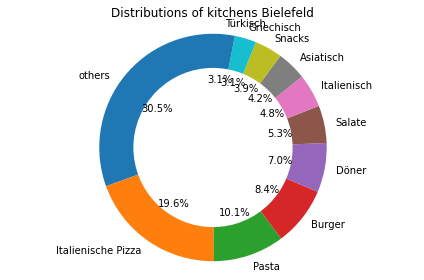

In [22]:
visualization.basic_pie(city2, "Bielefeld")

In the plotes above you can see the distribution of kitchens in each city. <br>
You can see that in Bielefeld we have a very high amount of "others". <br>
That is the case because tags which make up less than 5% in the sum of all kitchens(tags) are considered to small to show them as a single category. <br>
In the plot of Osnabrück with our kitchen groups you can see a cleaner distribution with more meaning. <br>
That is because we combine tags/kitchens like "Pasta", "Italienisch" and "Italienische Pizza" into one group because it usually appears together and <br>
refers to the same group of restaurants

Bar plots of the amount of kitchens in each city <br>
(The redline indicates the average amount per tag/kitchen)

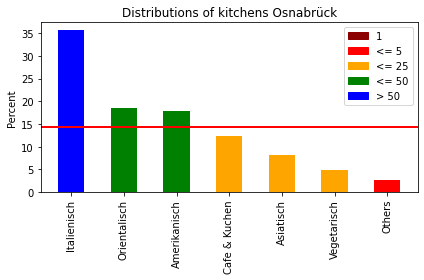

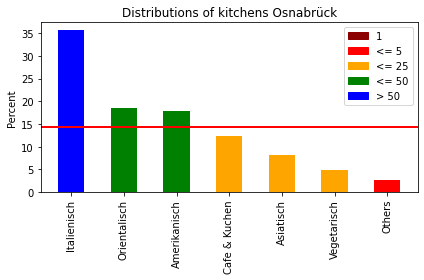

In [23]:
visualization.basic_bar(city1, "Osnabrück")

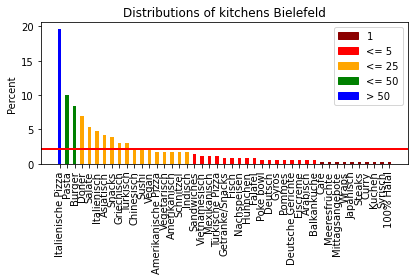

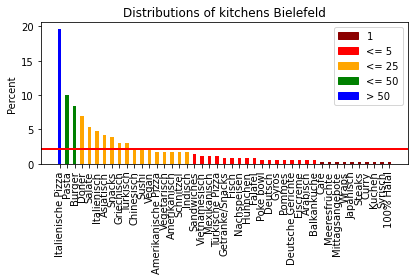

In [24]:
visualization.basic_bar(city2, "Bielefeld")

We can now clearly see the difference between the custom tags and Lieferando's tags.<br>
It is very visible that we have a much higher entropy with the default tags. <br>

For the next plot, the Bar plot of averages we will only look at one city. <br>
If we change the index value to a value in the range from 2 to 5 we get the average of: <br>
<ul>
<li>2. delivery time </li>
<li>3. delivery cost</li>
<li>4. minimum amount for an order</li>
<li>5. rating</li>
</ul> <br>
The bars show the average in each category and the red line for the whole city/location

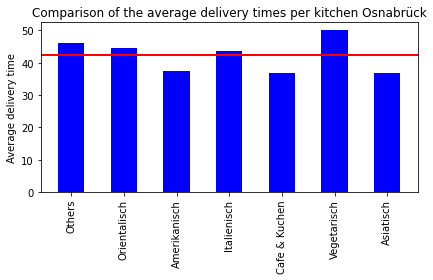

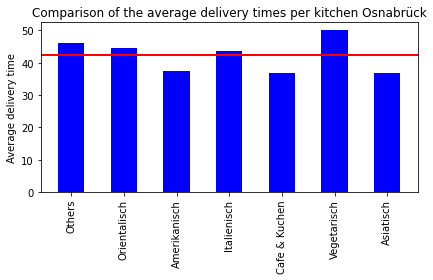

In [26]:
# delivery time
visualization.avg_bar(city1, index=2, city_name="Osnabrück")

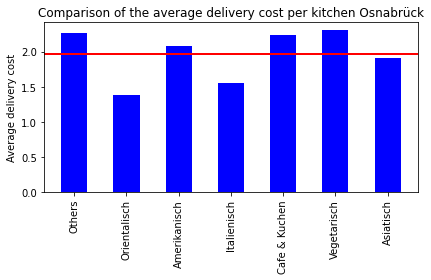

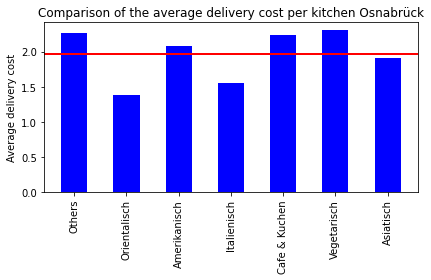

In [27]:
# delivery cost
visualization.avg_bar(city1, index=3, city_name="Osnabrück")

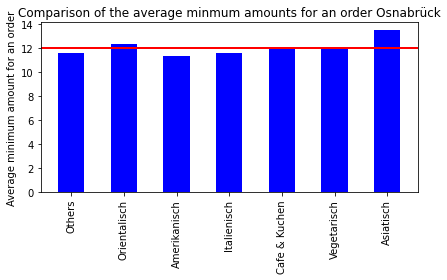

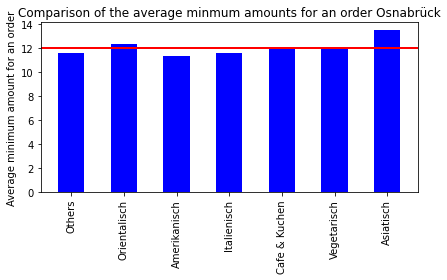

In [28]:
# minimum amount of order for delivery
visualization.avg_bar(city1, index=4, city_name="Osnabrück")

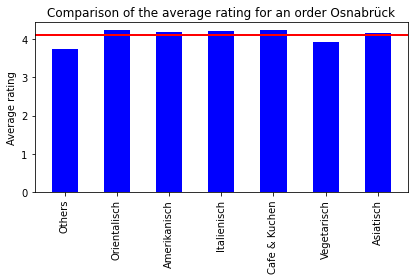

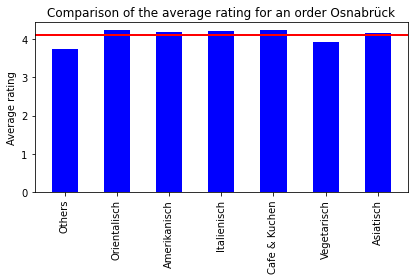

In [29]:
# rating
visualization.avg_bar(city1, index=5, city_name="Osnabrück")

The next plot shows the difference in the amount of kitchens of the two cities<br>
To make them comparable we will also update the tags of the second city now


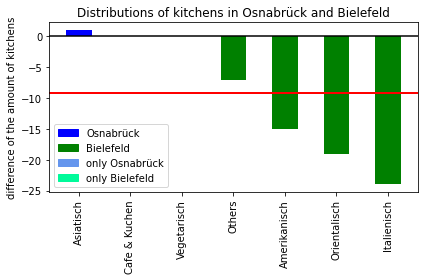

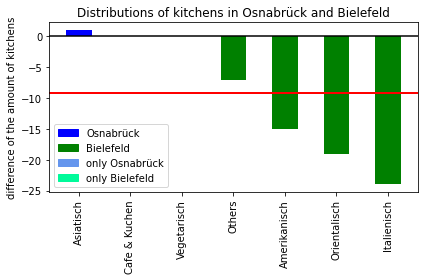

In [31]:
city2 = tag_correction(city2, kitchens)
visualization.kitchen_difference(city1, city2, "Osnabrück", "Bielefeld")

The bars show which city has more and how much more restaurants with the specific kitchen-type compared to the other city <br>
The red line again shows the average

The next graph compares the averages of two cities again choosen by giving an index from 2 to 5

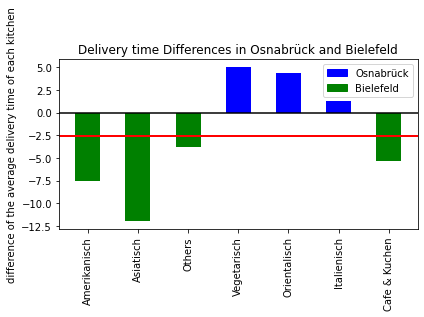

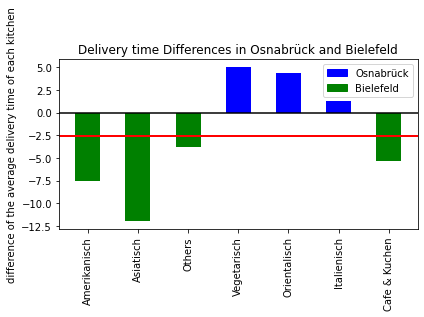

In [32]:
visualization.avg_difference(city1, city2, "Osnabrück", "Bielefeld", index=2)

TODO Text

The next graphs are best used with more cities to be meaningfull so we will add two cities and then go on


In [34]:
city3 = restaurants("Münster 48143")
city4 = restaurants("Wolfsburg")


<class 'selenium.common.exceptions.TimeoutException'>
<class 'selenium.common.exceptions.TimeoutException'>


In [35]:
city3 = tag_correction(city3, kitchens)
city4 = tag_correction(city4, kitchens)

Now we can display the kitchens of each city and the amount of each kitchen in the city in a heatmap <br>
If we switch the index to a value from 2 to 5 we can see the averages again (same as in the ones before)

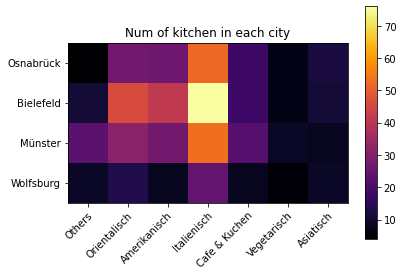

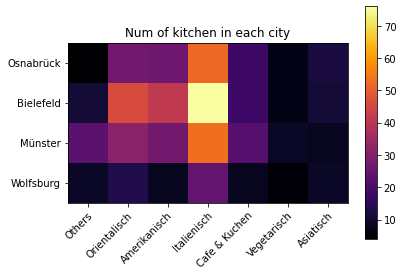

In [36]:
visualization.heatmap([city1, city2, city3, city4], ["Osnabrück", "Bielefeld", "Münster", "Wolfsburg"], index=-1)

In the heatmap we can see which city has the highest diversity in the categories. The more colorfull a row is the more kitches of each type can be found in that city. <br>
For example: We can see that Bielefeld has a lot to offer for the kitchen types "Orientalisch", "Amerikanisch" and "Italienisch" but hasn't got much to offer in for the type "Vegetarisch"

The next graph gives us the option to see the amounts of kitchens in different cities in 3D. <br>

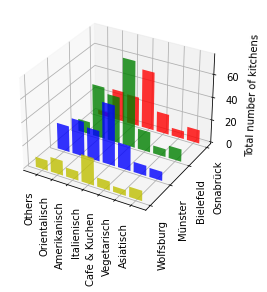

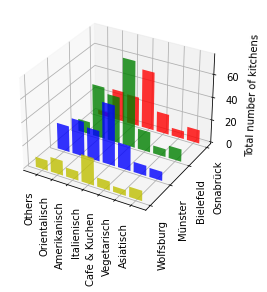

In [38]:
visualization.kitchen_distribution_3D([city1, city2, city3, city4], ["Osnabrück", "Bielefeld", "Münster", "Wolfsburg"])

We can get a good grasp of how many restaurants of each kitchen to be found in the cities but it gets a bit messy the more layers(here: cities) are added. <br>
So it is nice to show and aspire but not easily readable and exact